# Simulando o valor de $\pi$ através de sorteios

No colégio, todos aprendemos a usar a constante $\pi$ em Geometria para calcular a área de figuras geométricas, por exemplo. Aprendemos, também, que o valor da constante é de 3,1415926535... Nosso objetivo aqui é utilizar um modelo matemático simples para aproximar o valor de $\pi$ (ou seja, simular os valores de $\pi$ através de sorteios).

Vamos usar o método de Monte Carlo, que se baseia nas propriedades dos números aleatórios.

Para compreender o uso do método de Monte Carlo no cálculo de $\pi$, vamos primeiro desenvolver algumas relações geométricas que nos levarão a uma equação para o valor da constante $\pi$.


Sabemos que a área de uma circunferência de raio $r = 1/2$ é

$$A_{circ} = \pi r^2 = \pi/4$$

Sabemos, ainda, que a área de um quadrado de lado $l=1$ é dada pela

$$A_{quad} = l^2 = 1$$

Veja que podemos colocar esta circunferência inscrita no quadrado, pois o diâmetro da circunferência é $2r = 1$ e o lado do quadrado também é 1:

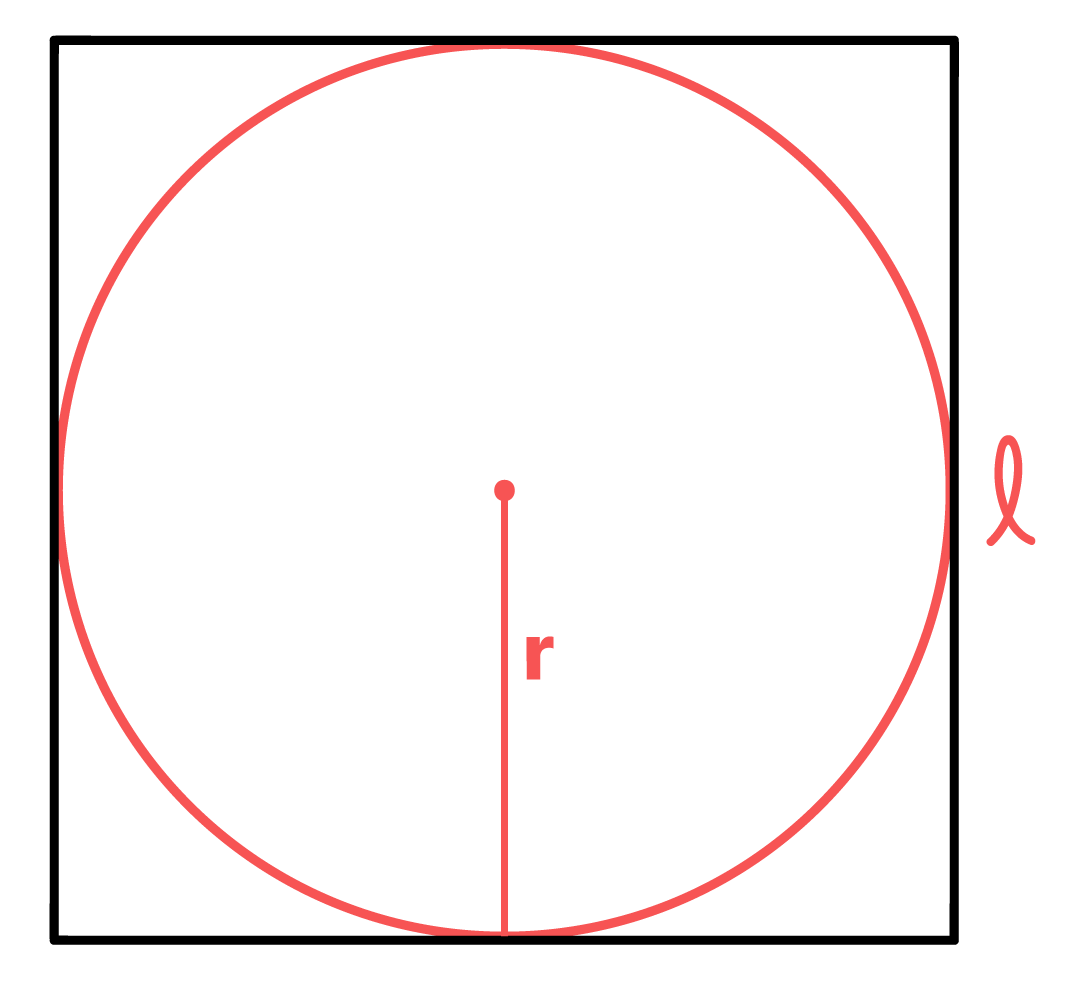

A razão entre a área da circunferência e a área do quadrado é

$$\frac{A_{circ}}{A_{quad}} = \frac{\pi}{4}$$

Ou seja,

$$ \pi = 4 \times \frac{A_{circ}}{A_{quad}} $$

Suponha que sorteamos vários pontos no quadrado aleatoriamente.

Para cada ponto, a coordenada x é sorteada entre 0 e 1 (com as mesmas chances para todos os números) e o mesmo vale para a coordenada y:

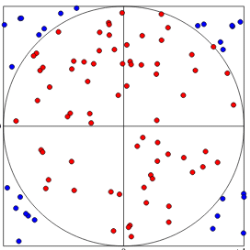

Qual a probabilidade de cada ponto cair dentro da área do círculo?

Ela é

$$p = \frac{A_{circ}}{A_{quad}}$$

E como vamos estimar probabilidade $p$?

Com a simulação!

Se sortearmos $n$ pontos e $n_{circ}$ pontos caírem dentro do círculo, então
$\frac{n_{circ}}{n}$ tem grandes chances de ser muito próximo de $p$ (se escolhermos $n$ grande)

Então reveja nossas contas:

$$ \pi = 4 \times \frac{A_{circ}}{A_{quad}} = 4 \times p \approx 4 \times \frac{n_{circ}}{n} $$

Ou seja

**$$ \pi \approx 4\frac{n_{circ}}{n}$$**

**Vamos usar esta última formula: $\pi$ é aproximadamente 4 vezes numero de pontos dentro de círculo dividido por  número total de pontos.**

**Observação:**
> No link https://www.youtube.com/watch?v=ELetCV_wX_c pode ser visualizada uma animação de simulação de valor $\pi$, que pode facilitar o entendimento desta parte de Notebook.
>
> Outra boa animação pode ser encontrada em https://engaging-data.com/estimating-pi/ (clique no botão `start/stop` posicionado no lado esquerdo superior da janela). Observe como mudam os dados abaixo do botão, por exemplo, alguns dos valores:

**Primeiro veja como sortearmos $n$ pontos:**

In [ ]:
import random as rd

n = 10               # neste caso n eh 10
for i in range(0,n): # sorteamos n=10 pontos (1 ponto em cada rodada de for)
  x = rd.random()       # sorteamos ponto x em intervalo [0,1]
  y = rd.random()       # sorteamos ponto y em intervalo [0,1]
  print(x,y)            #impriminos ponto x,y

**Como saber se um ponto $(x,y)$ está dentro do círculo**:

O círculo tem centro $(0.5, 0.5)$ e o raio é $0.5$. Então $(x,y)$ se encontra dentro do círculo se a distância de $(x,y)$ para $(0.5, 0.5)$ é no máximo 0.5.

A distância de $(x,y)$ para $(0.5, 0.5)$ é dada pela fórmula:
$$\sqrt{(x-0.5)^2 + (y-0.5)^2}.$$

**Então, se**
$$\sqrt{(x-0.5)^2 + (y-0.5)^2} \leq 0.5$$
**o ponto $(x,y)$ está dentro do círculo. Caso contrário, está fora.**

**O seguinte algoritmo imprime 10 pontos aleatórios, e para cada um imprime se está dentro ou fora de círculo**.

In [ ]:
n = 10
for i in range(0,n): # sorteamos n=10 pontos (1 ponto em cada rodada de laco)
  x = rd.random()
  y = rd.random()
  print(x,y)
  dist = ((x-0.5)**2 + (y-0.5)**2)**0.5  # dist calcula a distancia entre o ponto (x,y) e centro de circulo
  if dist <= 0.5:                        # se dist <= 0.5, entao o ponto esta dentro de circulo
    print("Dentro de circulo\n")            # lembre-se que o caractere \n serve para quebra de linha (pula para proxima linha).
  else:                                  # se dist > 0.5, entao o ponto esta fora de circulo
    print("Fora de circulo\n")

Agora **vamos criar uma variável `ncirc` para contar quantos pontos estão dentro do círculo:**

In [ ]:
n = 10
ncirc = 0        # inicializamos ncirc por 0 no inicio de programa. ncirc vai contar o numero de pontos dentro de circulo

for i in range(0,n):  # sorteamos 10 pontos (1 ponto em cada rodada de laco for)
  x = rd.random()
  y = rd.random()
  print(x,y)
  dist = ((x-0.5)**2 + (y-0.5)**2)**0.5
  if dist <= 0.5:
    print("Dentro\n")
    ncirc = ncirc + 1     # o pronto (x,y) esta dentro de circulo, portanto aumentamos contador ncirc por 1
  else:
    print("Fora\n")

print("Número de pontos dentro do círculo:",ncirc) # fazemos impressao de resultado fora de laco for (apos sortear 10 pontos)
print("Número total de pontos:",n)
p_est = ncirc/n  # p_est eh numero de pontos dentro de circulo (ncirc) dividido por  numero total de pontos (n)
pi_est = 4*p_est # estimativa para pi eh 4*p_est (4 vezes numero de pontos dentro de circulo dividido por  numero total de pontos)
print("Estimativa para p (probabilidade)",p_est)
print("Estimativa para pi",pi_est)

## Repetindo 100 vezes

> Quão boa é a nossa aproximação para $\pi$?

Vamos importar a biblioteca `math` para verificar (precisamos de biblioteca `math` para comparar a diferenca entre o valor exato de pi que é `math.pi` com a nossa estimativa/aproximação).

Vamos rodar com n=100. Tiramos os prints de dentro do for, pois fica difícil de ler.


In [ ]:
import math
n = 100 # agora n eh 100
ncirc = 0
for i in range(0,n):  # repetimos n=100 vezes, ou seja, sorteamos 100 pontos (um ponto em cada rodada de laco)
  x = rd.random()
  y = rd.random()
  dist = ((x-0.5)**2 + (y-0.5)**2)**0.5
  if dist < 0.5:
    ncirc = ncirc + 1

print("Número de pontos dentro do círculo:",ncirc) # imprimimos resultados fora de for, ou seja, apos 100 rodadas (em cada rodada escolhemos um ponto aleatoreo)
print("Número total de pontos:",n)
p_est = ncirc/n
pi_est = 4*p_est
print("Estimativa para p (probabilidade)",p_est)
print("Estimativa para pi",pi_est)
print("Erro", abs(math.pi - pi_est))  # imprmimos o Erro, que eh valor absoluto de diferenca entre o valor exato de pi (math.pi) e a nossa estimativa (pi_est)

Rode a célula aacima várias vezes para ver o que acontece.

Como você pode ver, o quão boa fica a estimativa varia bastante.



## Repetindo n vezes

Vamos fazer uma comparação para os valores de $n$: 10,100,1000,10000,50000,100000.

In [ ]:
import math

valores = [10,100,1000,10000,50000,100000,100000]  # valores eh uma lista com numeros 10, 100, 1000, etc

for n in valores: # laco EXTERNO: na primeira rodada de laco externo, n eh 10; na segunda rodada, n eh 100, etc
  ncirc = 0            # inicializamos ncirc com 0 ates de comecar o jogo numa certa rodada de laco
  for i in range(0,n): # laco INTERNO: repetimos n vezes, ié, sorteamos n pontos, para cada valor de n no laco externo: primeiro n eh 10; depois n eh 100, etc
    x = rd.random()
    y = rd.random()
    dist = ((x-0.5)**2 + (y-0.5)**2)**0.5
    if dist < 0.5:
      ncirc = ncirc + 1

  # imprimimos resultado e erro apos 10 rodadas, apos 100 rodadas....apos 100000 rodadas
  # note que esta parte fica fora de bloco de laco INTERNO, e dentro de bloco de laco EXTERNO
  print("Número de pontos dentro do círculo:",ncirc)
  print("Número total de pontos:",n)
  p_est = ncirc/n
  pi_est = 4*p_est
  print("Estimativa para p",p_est)
  print("Estimativa para pi",pi_est)
  print("Erro", abs(math.pi - pi_est))
  print() # imprimimos linha vazia


**Note como a estimativa para $\pi$ tende a melhorar (e erro diminuir) quando AUMENTAMOS $n$.**

Logo, a simulação deu certo.

## Exercícios

1. Faça uma simulação com 50 repetições do jogo, com 100 pontos sorteados a cada repetição. Calcule a média de erro (onde erro é valor absoluto de diferença entre o valor exato de $\pi$ e a nossa estimativa obtida para $\pi$ em cada repetição de jogo).
2. Faça uma simulação com 10 repetições do jogo, com 500 pontos sorteados a cada repetição. Calcule a média de erro (onde erro é valor absoluto de diferença entre o valor exato de $\pi$ e a nossa estimativa obtida para $\pi$ em cada repetição de jogo).
3. Qual estratégia é melhor, ou seja, apresenta menor erro médio?


In [ ]:
# Exrcicio 1
# Faça uma simulação com 50 repetições com 100 pontos sorteados a cada repetição

import math

somaErro=0 # inicializamos somaErro com 0

for j in range(50): # 50 repeticoes
  ncirc = 0
  for i in range(100): # cada vez (em cada uma de 50 repeticoes) sorteamos 100 pontos
    x = rd.random()
    y = rd.random()
    dist = ((x-0.5)**2 + (y-0.5)**2)**0.5
    if dist < 0.5:
      ncirc = ncirc + 1

  print("Número de pontos dentro do círculo:",ncirc)
  print("Número total de pontos:",100)
  p_est = ncirc/100
  pi_est = 4*p_est
  print("Estimativa para p",p_est)
  print("Estimativa para pi",pi_est)
  print("Erro", abs(math.pi - pi_est))
  somaErro=somaErro + abs(math.pi - pi_est) # atualizamos somaErro
  print()  # imprimimos linha vazia

print("Media de erro em 50 repeticoes, com 100 pontos em cada repeticao eh", somaErro/50)  # apos terminar 50 repeticoes, calculamos a media de erros


In [ ]:
# Exrcicio 2

import math

somaErro=0

for j in range(10): # 10 repeticoes (simulacoes)
  ncirc = 0
  for i in range(500): # cada vez (em cada repeticao) sorteamos 500 pontos
    x = rd.random()
    y = rd.random()
    dist = ((x-0.5)**2 + (y-0.5)**2)**0.5
    if dist < 0.5:
      ncirc = ncirc + 1

  print("Número de pontos dentro do círculo:",ncirc)
  print("Número total de pontos:",500)
  p_est = ncirc/500
  pi_est = 4*p_est
  print("Estimativa para p",p_est)
  print("Estimativa para pi",pi_est)
  print("Erro", abs(math.pi - pi_est))
  somaErro=somaErro + abs(math.pi - pi_est)
  print()

print("Media de erro em 10 repeticoes, com 500 pontos em cada repeticao eh", somaErro/10) # apos terminar 10 repeticoes, calculamos a media de erros


Qual estratégia é melhor?